In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
matr = pd.read_csv('Desktop/sport/dataset_Facebook.csv', sep=';')

In [25]:
matr.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Найдем основные характеристики всего массива (исключив категориальные признаки)

In [27]:
new_matr = matr[['Page total likes','Type', 'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',\
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',\
       'Lifetime Post Impressions by people who have liked your Page',\
       'Lifetime Post reach by people who like your Page',\
       'Lifetime People who have liked your Page and engaged with your post',\
       'comment', 'like', 'share', 'Total Interactions']]
new_matr.describe(percentiles=[.5])

,Page total likes,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
50%,129600.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
max,139441.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Рассмотрим, какие есть типы (Type) и какое между ними соотношение

['Photo' 'Status' 'Link' 'Video']


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


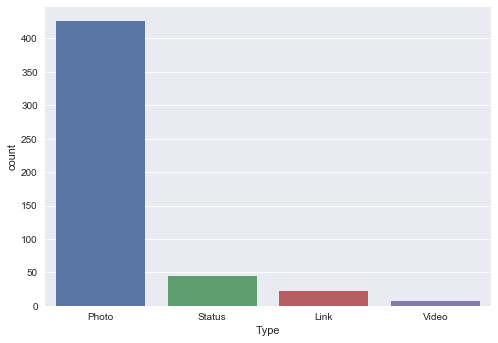

In [19]:
print(matr['Type'].unique())
sns.countplot(matr['Type']);
plt.show()

Находим максимальные элементы по каждому типу. Здесь видно, что самый популярный элемент во всей таблице (если судить по столбцу 'Total Interactions') - тип 'Photo'-244, самый частый вид контента, судя по гистограмме выше.

In [24]:
list_ind = []
for i in ['Photo', 'Status', 'Link', 'Video']:
    vid_mat = matr[matr['Type']==i]
    mx = vid_mat['Total Interactions'].max()
    list_ind.append(vid_mat[vid_mat['Total Interactions']==mx].index[0])
matr.iloc[list_ind]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334
142,136013,Status,2,10,3,2,1.0,31136,59964,6164,5934,9237,35977,18048,4376,60,859.0,90.0,1009
403,107907,Link,1,4,2,6,0.0,70912,94172,1374,1106,1267,42338,27232,788,1,379.0,40.0,420
71,137893,Video,1,11,5,3,1.0,100768,220447,2101,1735,2331,59658,18880,885,17,449.0,84.0,550


Проанализируем подробнее самый популярный элемент. Время выкладывания поста (неделя и месяц) не кажутся необычными. Время в часах (5) не самое частое время выкладывания поста, возможно, это повлияло на его популярность (отсутствовали публикации у других групп)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


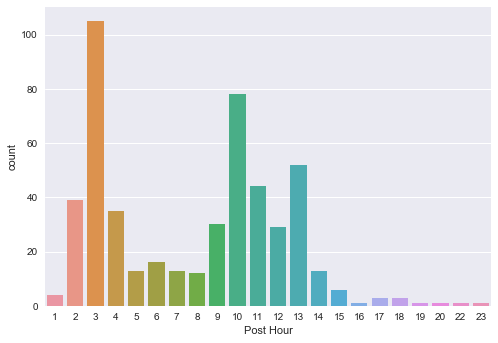

In [31]:
sns.countplot(matr['Post Hour']);
plt.show()

Reach - количество уникальных людей, которые видели ваш пост, а impressions - количество просмотров поста (один человек может посмотреть пост много раз). По сравнению с другими постами, у популярного поста больше всего уникальных просмотров (несмотря на то, что по общему числу просмотров есть и посты, превышающие самый популярный). 
Также высокое соотношение между 'Lifetime Post Total Impressions' и 'Lifetime Post Total Reach', т.е. около половины всех просмотров - уникальные пользователи. Такие показатели только у менее чем 12% постов.

In [43]:
matr[matr['Lifetime Post Total Reach']>=matr.iloc[244]['Lifetime Post Total Reach']]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334


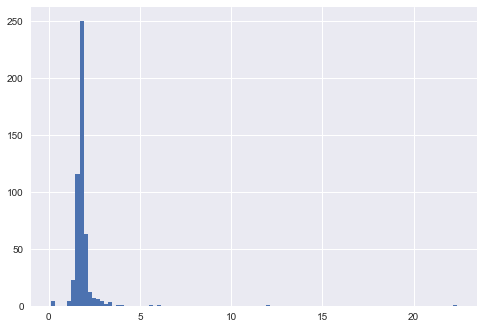

0.12


In [48]:
ss = matr['Lifetime Post Total Impressions']/matr['Lifetime Post Total Reach']
ss.hist(bins=100)
plt.show()
print(ss[ss>2].shape[0]/500)

Также, у поста наибольшее число уникальных пользователей в столбце 'Lifetime Post reach by people who like your Page'. При одновременно большом числе общих посещений хорошо относящихся к данной странице пользователей ('Lifetime Post Impressions by people who have liked your Page') это хороший показатель.

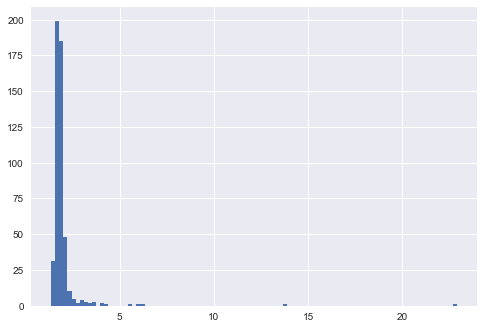

0.172


In [50]:
ss = matr['Lifetime Post Impressions by people who have liked your Page']/matr['Lifetime Post reach by people who like your Page']
ss.hist(bins=100)
plt.show()
print(ss[ss>2].shape[0]/500)

Пост 244 самый большой по числу лайков, комментарив и репостов во всей таблице. Очевидно, эти признаки сильнее всего влияют на популярность поста, что хорошо видно на матрице корреляций. Также видно, что показатель 'Total Interactions' сильнее всего (кроме лайков, комментарией и репостов) зависит от Post total Reach, Engaged Users, Reach by people like your page. И именно эти показатели у популярного поста либо максимальные для всей выборки, либо очень большие (95 процентиль). Также, судя по признаку 'Page total likes', данная страница достаточно популярна.
Отметим, что данные рассуждения также применимы к популярным постам другого контента.

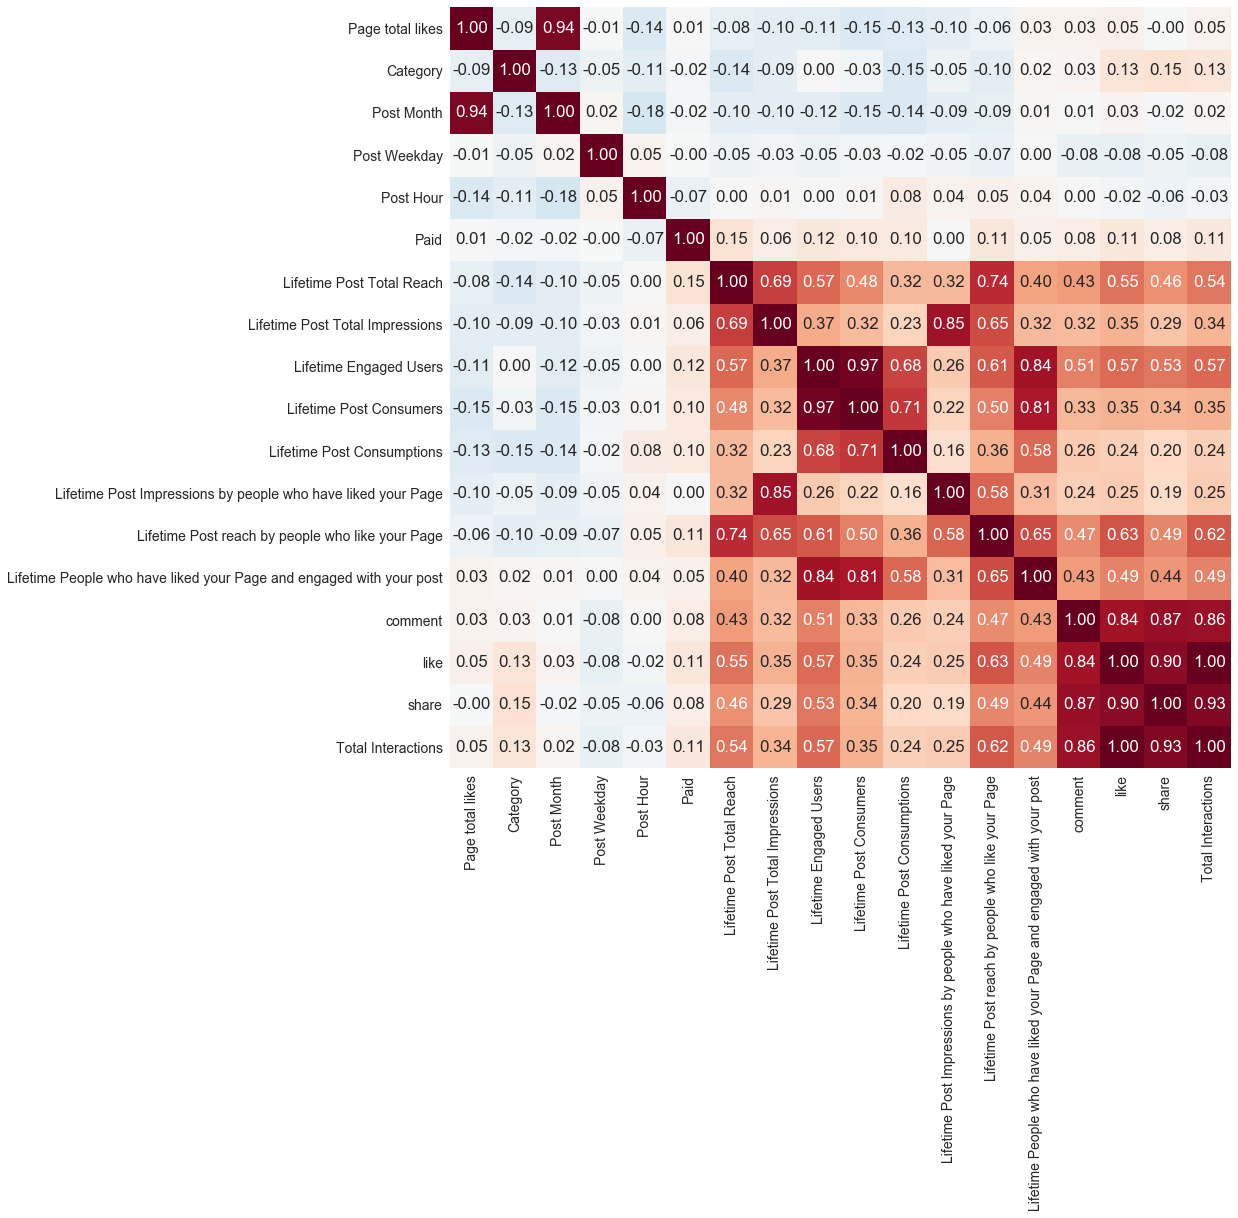

In [56]:
f,ax = plt.subplots(figsize=(14,14));
sns.set(font_scale=1.4)
sns.heatmap(matr.corr(),fmt='.2f', annot=True,cbar=False)
plt.show()